In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [21]:
# Load and preprocess the dataset
df = pd.read_csv('Breast Cancer Diagnosis Dataset with Tumor Characteristics.csv')
df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
features = df.drop(columns=['diagnosis'])


In [22]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [23]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['diagnosis'], test_size=0.2, random_state=42)


In [24]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_features)


In [27]:
def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),  # Increased step size
                         np.arange(y_min, y_max, 0.1))  # Increased step size
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=20, cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

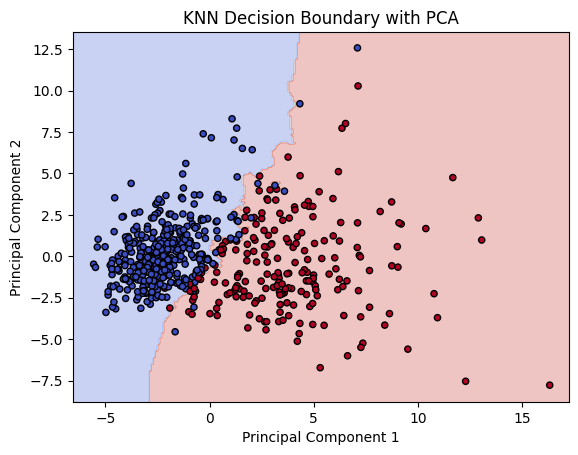

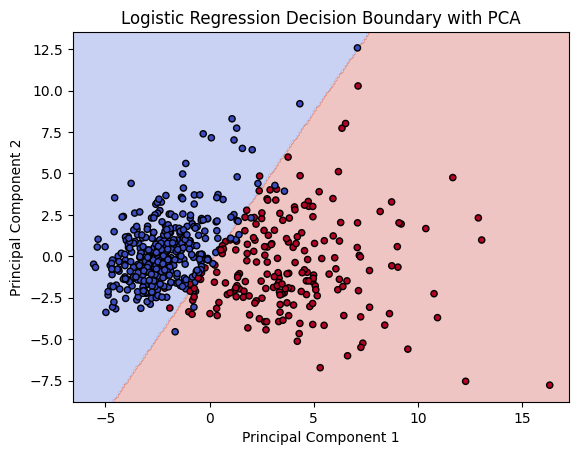

In [28]:
# Plot decision boundaries
plot_decision_boundary(knn_pca, X_pca, df['diagnosis'], 'KNN Decision Boundary with PCA')
plot_decision_boundary(logreg_pca, X_pca, df['diagnosis'], 'Logistic Regression Decision Boundary with PCA')